In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

In [ ]:
df = pd.read_csv("Annotated_data.csv")

In [ ]:
df.head()

,Id_Number,Patient Question,Distorted part,Dominant Distortion,Secondary Distortion (Optional)
0,4500,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalization,NaN
1,4501,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling,Emotional Reasoning
2,4502,So I’ve been dating on and off this guy for a...,NaN,No Distortion,NaN
3,4503,My parents got divorced in 2004. My mother has...,NaN,No Distortion,NaN
4,4504,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune-telling,Emotional Reasoning


In [ ]:
df.isnull().sum()

Id_Number                             0
Patient Question                      0
Distorted part                      933
Dominant Distortion                   0
Secondary Distortion (Optional)    2114
dtype: int64

<Axes: >

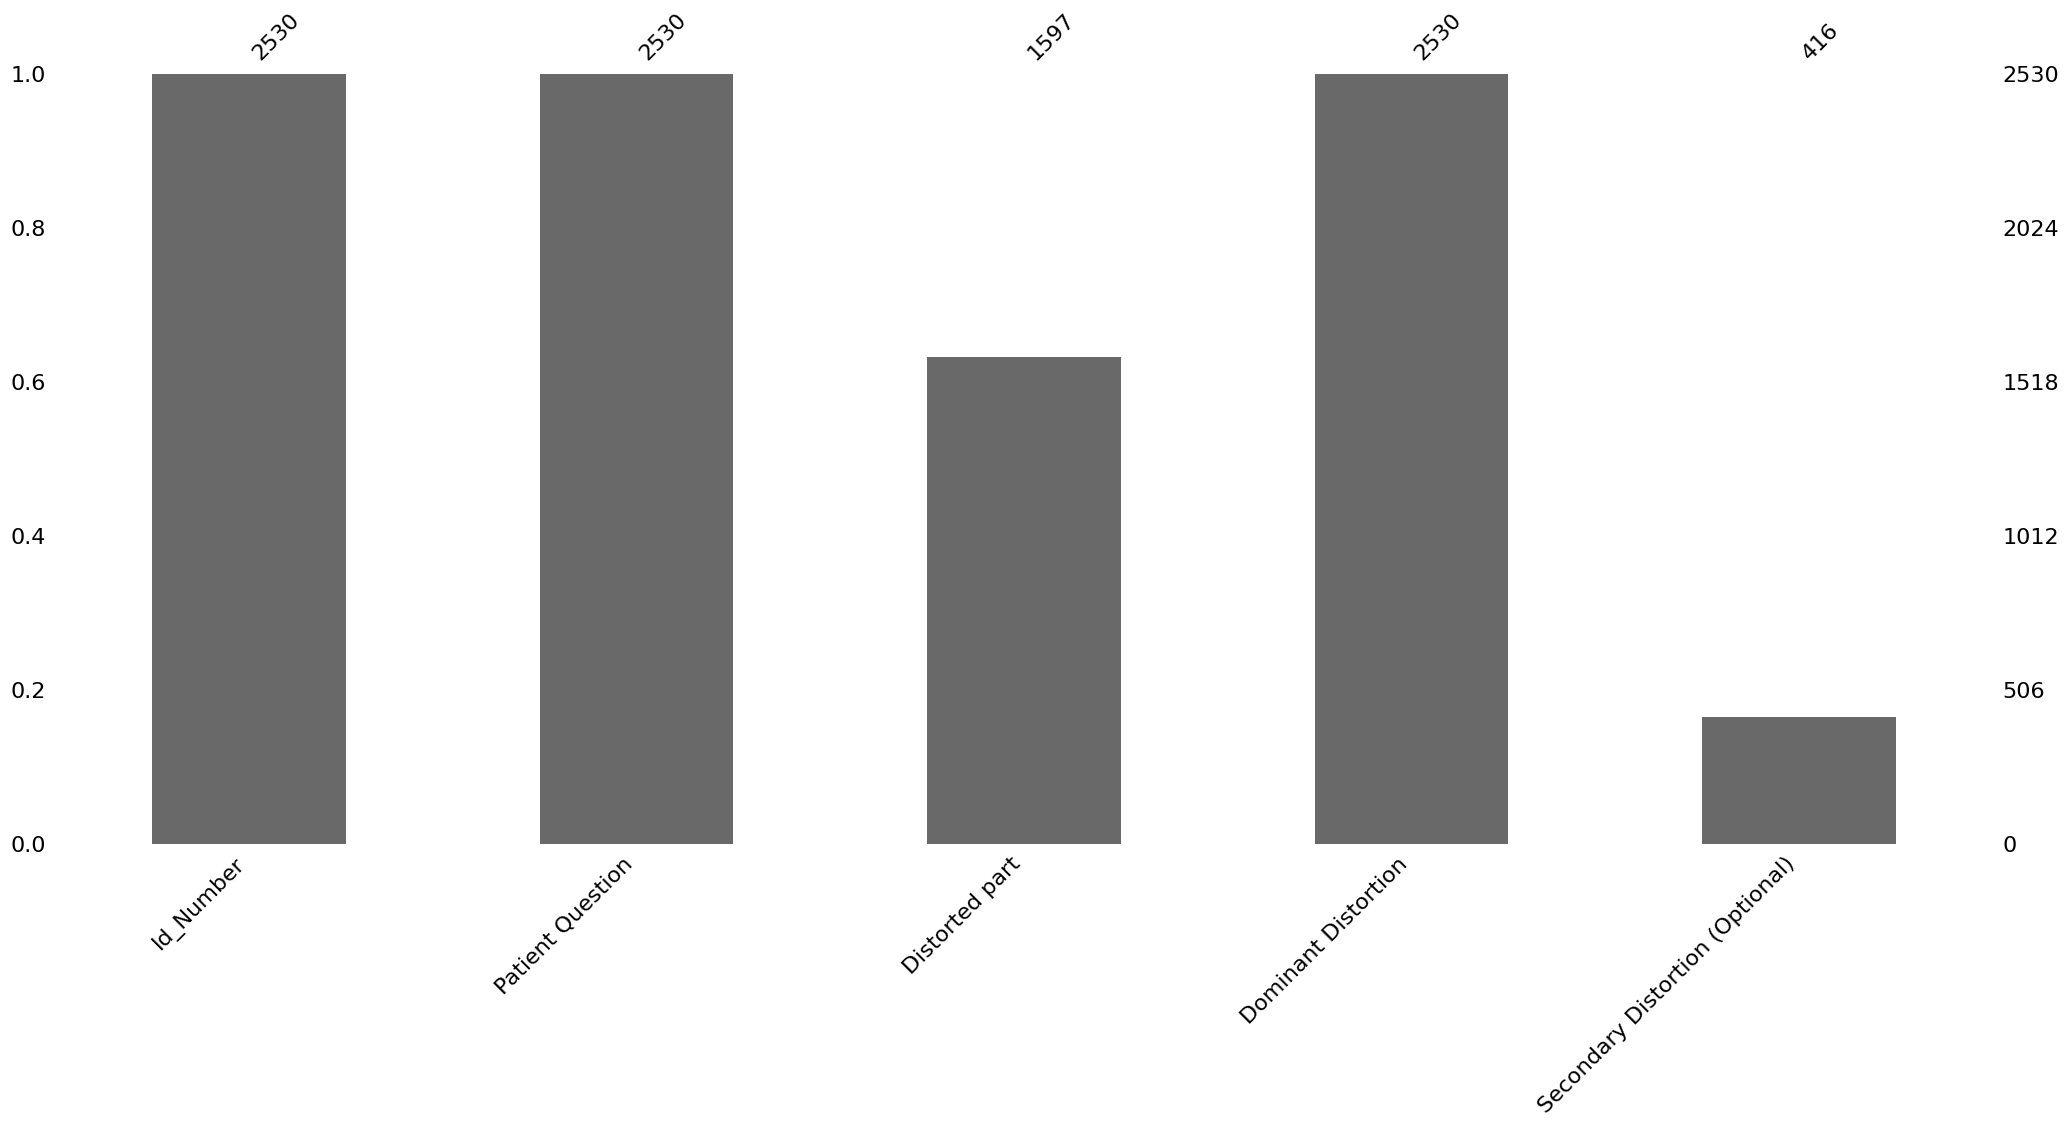

In [ ]:
msn.bar(df)

In [ ]:
df.shape

(2530, 5)

In [ ]:
df.drop("Secondary Distortion (Optional)",axis=1,inplace = True)

In [ ]:
df.head()

,Id_Number,Patient Question,Distorted part,Dominant Distortion
0,4500,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalization
1,4501,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling
2,4502,So I’ve been dating on and off this guy for a...,NaN,No Distortion
3,4503,My parents got divorced in 2004. My mother has...,NaN,No Distortion
4,4504,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune-telling


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df['Dominant Distortion'].unique()

array(['Personalization', 'Labeling', 'No Distortion', 'Fortune-telling',
       'Magnification', 'Mind Reading', 'All-or-nothing thinking',
       'Overgeneralization', 'Mental filter', 'Emotional Reasoning',
       'Should statements'], dtype=object)

In [ ]:
df['Dominant Distortion'].unique().shape

(11,)

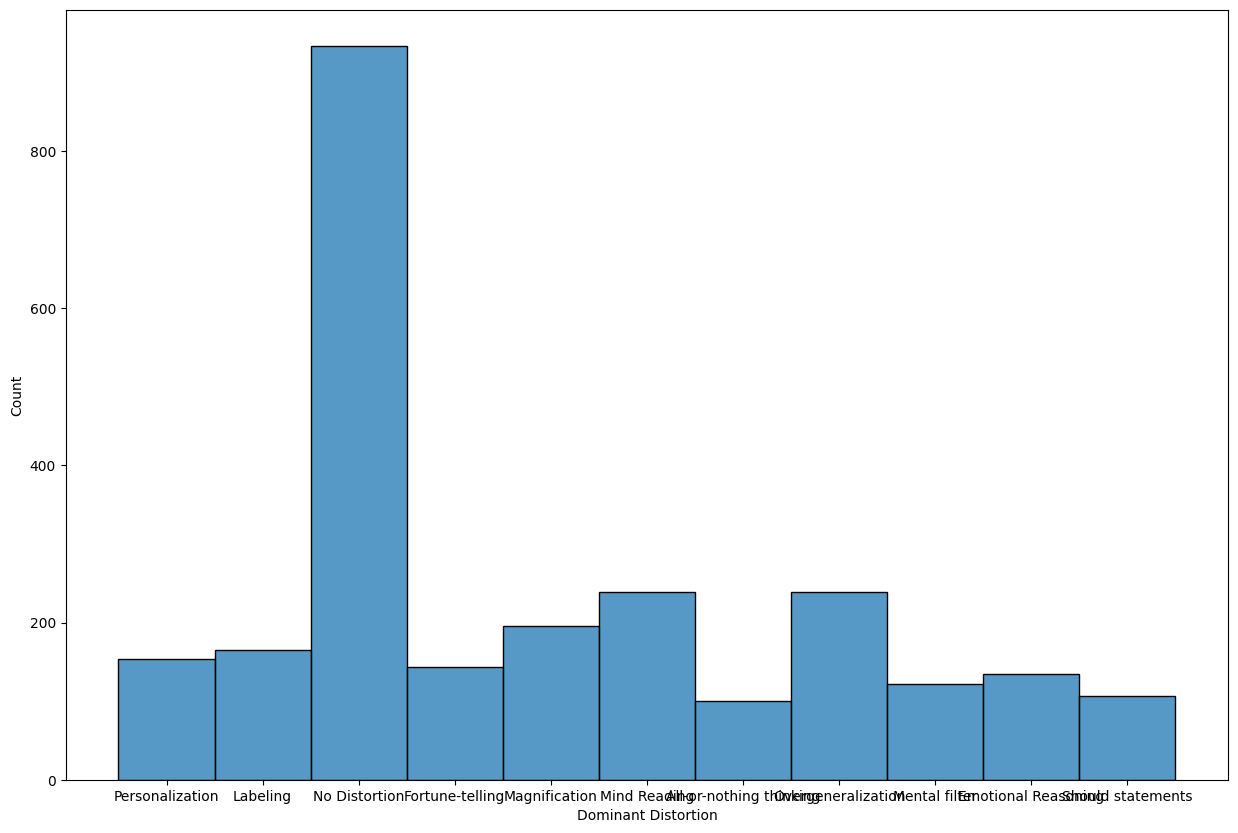

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(df['Dominant Distortion'])
plt.show()

In [ ]:
le = LabelEncoder()
df['Dominant Distortion'] = le.fit_transform(df['Dominant Distortion'])

In [ ]:
df['Dominant Distortion']

0       9
1       3
2       7
3       7
4       2
       ..
2525    7
2526    8
2527    5
2528    7
2529    7
Name: Dominant Distortion, Length: 2530, dtype: int64

In [ ]:
df['Dominant Distortion'].value_counts()

7     933
6     239
8     239
4     195
3     165
9     153
2     143
1     134
5     122
10    107
0     100
Name: Dominant Distortion, dtype: int64

In [ ]:
df.isnull().sum()

Id_Number                0
Patient Question         0
Distorted part         933
Dominant Distortion      0
dtype: int64

In [ ]:
df.fillna(value='0',inplace = True)

In [ ]:
df.isnull().sum()

Id_Number              0
Patient Question       0
Distorted part         0
Dominant Distortion    0
dtype: int64

In [ ]:
import nltk
import re
nltk. download('stopwords')
from nltk. corpus import stopwords
stopword=set(stopwords.words('english'))
stemmer = nltk. SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['Patient Question'] = df['Patient Question'].str.lower()

In [ ]:
df['Distorted part'] = df['Distorted part'].str.lower()

In [ ]:
df.head()

,Id_Number,Patient Question,Distorted part,Dominant Distortion
0,4500,"hello, i have a beautiful,smart,outgoing and a...",the voice are always fimilar (someone she know...,9
1,4501,since i was about 16 years old i’ve had these ...,i feel trapped inside my disgusting self and l...,3
2,4502,so i’ve been dating on and off this guy for a...,0,7
3,4503,my parents got divorced in 2004. my mother has...,0,7
4,4504,i don’t really know how to explain the situati...,i refused to go because i didn’t know if it wa...,2


In [ ]:
import string
punctuations_list = string.punctuation

In [ ]:
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

In [ ]:
df['Patient Question']= df['Patient Question'].apply(lambda x: remove_punctuations(x))
df.head()

,Id_Number,Patient Question,Distorted part,Dominant Distortion
0,4500,hello i have a beautifulsmartoutgoing and amaz...,the voice are always fimilar (someone she know...,9
1,4501,since i was about 16 years old i’ve had these ...,i feel trapped inside my disgusting self and l...,3
2,4502,so i’ve been dating on and off this guy for a...,0,7
3,4503,my parents got divorced in 2004 my mother has ...,0,7
4,4504,i don’t really know how to explain the situati...,i refused to go because i didn’t know if it wa...,2


In [ ]:
df['Distorted part']= df['Distorted part'].apply(lambda x: remove_punctuations(x))
df.head()

,Id_Number,Patient Question,Distorted part,Dominant Distortion
0,4500,hello i have a beautifulsmartoutgoing and amaz...,the voice are always fimilar someone she knows...,9
1,4501,since i was about 16 years old i’ve had these ...,i feel trapped inside my disgusting self and l...,3
2,4502,so i’ve been dating on and off this guy for a...,0,7
3,4503,my parents got divorced in 2004 my mother has ...,0,7
4,4504,i don’t really know how to explain the situati...,i refused to go because i didn’t know if it wa...,2


In [ ]:
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    important_words = []

    for word in str(text).split():

        if word not in stop_words:

            lemmatizer = WordNetLemmatizer()
            lemmatizer.lemmatize(word)

            important_words.append(word)

    output = " ".join(important_words)

    return output


In [ ]:
df['Patient Question'] = df['Patient Question'].apply(lambda text: remove_stopwords(text))
df.head()

,Id_Number,Patient Question,Distorted part,Dominant Distortion
0,4500,hello beautifulsmartoutgoing amazing five year...,the voice are always fimilar someone she knows...,9
1,4501,since 16 years old i’ve “spells” it’s impossib...,i feel trapped inside my disgusting self and l...,3
2,4502,i’ve dating guy almost 3 years 3 years younger...,0,7
3,4503,parents got divorced 2004 mother never recover...,0,7
4,4504,don’t really know explain situation deal lot f...,i refused to go because i didn’t know if it wa...,2


In [ ]:
df['Distorted part'] = df['Distorted part'].apply(lambda text: remove_stopwords(text))
df.head()

,Id_Number,Patient Question,Distorted part,Dominant Distortion
0,4500,hello beautifulsmartoutgoing amazing five year...,voice always fimilar someone knows im concerne...,9
1,4501,since 16 years old i’ve “spells” it’s impossib...,feel trapped inside disgusting self like i’m w...,3
2,4502,i’ve dating guy almost 3 years 3 years younger...,0,7
3,4503,parents got divorced 2004 mother never recover...,0,7
4,4504,don’t really know explain situation deal lot f...,refused go didn’t know going go record could p...,2


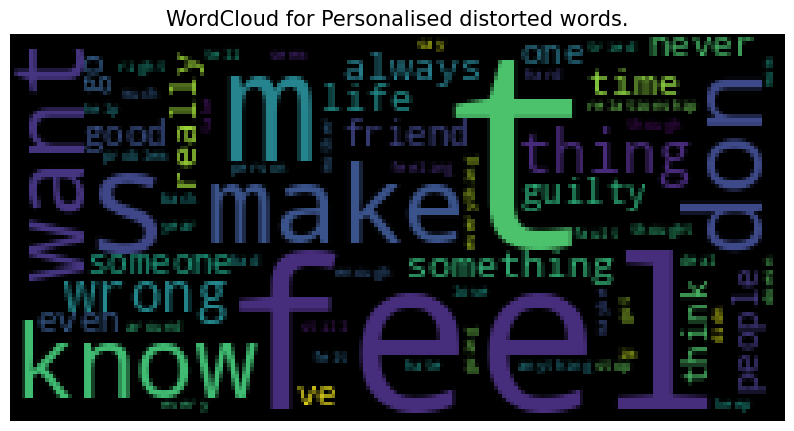

In [ ]:

def plot_word_cloud(data, typ):
  words_corpus = " ".join(data['Distorted part'])

  plt.figure(figsize = (10,10))

  wc = WordCloud(max_words = 100,
                width = 200,
                height = 100,
                collocations = False).generate(words_corpus)

  plt.title(f'WordCloud for {typ} distorted words.', fontsize = 15)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()

plot_word_cloud(df[df['Dominant Distortion']==9], typ='Personalised')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df['Distorted part']
y = df['Dominant Distortion']

In [ ]:
X

0       voice always fimilar someone knows im concerne...
1       feel trapped inside disgusting self like i’m w...
2                                                       0
3                                                       0
4       refused go didn’t know going go record could p...
                              ...                        
2525                                                    0
2526    university peers around social lives boyfriend...
2527    claims he’s severely depressed outbursts coupl...
2528                                                    0
2529                                                    0
Name: Distorted part, Length: 2530, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize(data,tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    #words = tfidf_vect_fit.get_feature_names()
    vocabulary = tfidf_vect_fit.vocabulary_
    words = list(vocabulary.keys())
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return(X_tfidf_df)

In [ ]:
tfidf_vect = TfidfVectorizer()
tfidf_vect_fit=tfidf_vect.fit(X)
X=vectorize(X,tfidf_vect_fit)

In [ ]:
X

,voice,always,fimilar,someone,knows,im,concerned,hope,nothing,pregnancy,...,catches,discarded,overprotectiveness,introvert,boyfriends,perpetual,outbursts,rants,lifestyles,threatens
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2526,0.26131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2528,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X, y = resample.fit_resample(X, y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2022)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
scores = cross_val_score(rf,X_train,y_train.values.ravel(),cv=5)

In [ ]:
print(scores)
scores.mean()

[0.96938065 0.96311761 0.97077244 0.96590118 0.97562674]


0.9689597253640845

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5,50,100],
    'max_depth': [2,10,20,None]
}

cv = GridSearchCV(rf,parameters)
cv.fit(X_train,y_train.values.ravel())
print(cv)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 10, 20, None],
                         'n_estimators': [5, 50, 100]})


In [ ]:
cv.best_estimator_

RandomForestClassifier()

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
y_rf_predicted = cv.predict(X_test)
print("f1_score:",f1_score(y_test,y_rf_predicted,average = 'macro'))
print("precision_score:",precision_score(y_test,y_rf_predicted,average = 'macro'))
print("recall_score:",recall_score(y_test,y_rf_predicted,average = 'macro'))


f1_score: 0.9771980131881747
precision_score: 0.9776116761564182
recall_score: 0.9775274400469265


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.8242936018187723

In [ ]:
y_dtc_predicted = dtc.predict(X_test)
print("f1_score:",f1_score(y_test,y_dtc_predicted ,average = 'macro'))
print("precision_score:",precision_score(y_test,y_dtc_predicted ,average = 'macro'))
print("recall_score:",recall_score(y_test,y_dtc_predicted ,average = 'macro'))

f1_score: 0.8255050080717495
precision_score: 0.8253529920239793
recall_score: 0.8269660960806949


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.937642091588178

In [ ]:
y_clf_predicted = clf.predict(X_test)
print("f1_score:",f1_score(y_test,y_clf_predicted ,average = 'macro'))
print("precision_score:",precision_score(y_test,y_clf_predicted ,average = 'macro'))
print("recall_score:",recall_score(y_test,y_clf_predicted ,average = 'macro'))

f1_score: 0.9385282073398851
precision_score: 0.9400579594281626
recall_score: 0.9393958304653562


In [ ]:
from sklearn.svm import SVC
svc =SVC()
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.9935043845404352

In [ ]:
y_svc_predicted = svc.predict(X_test)
print("f1_score:",f1_score(y_test,y_svc_predicted ,average = 'macro'))
print("precision_score:",precision_score(y_test,y_svc_predicted ,average = 'macro'))
print("recall_score:",recall_score(y_test,y_svc_predicted ,average = 'macro'))

f1_score: 0.9935604045769815
precision_score: 0.9937151073067555
recall_score: 0.9934634848669376


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

0.9324455992205262

In [ ]:
y_xgb_predicted = xgb.predict(X_test)
print("f1_score:",f1_score(y_test,y_xgb_predicted,average = 'macro'))
print("precision_score:",precision_score(y_test,y_xgb_predicted,average = 'macro'))
print("recall_score:",recall_score(y_test,y_xgb_predicted,average = 'macro'))

f1_score: 0.9327038774916262
precision_score: 0.9340199007997405
recall_score: 0.9338962950104718


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_test, y_test)

0.9691458265670673

In [ ]:
y_clf_g_predicted = gnb.predict(X_test)
print("f1_score:",f1_score(y_test,y_clf_g_predicted,average = 'macro'))
print("precision_score:",precision_score(y_test,y_clf_g_predicted,average = 'macro'))
print("recall_score:",recall_score(y_test,y_clf_g_predicted,average = 'macro'))

f1_score: 0.9695708597924976
precision_score: 0.970548951412905
recall_score: 0.9700886926415874


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
ada.score(X_test, y_test)

0.23189347190646314

In [ ]:
y_clf_ada_predicted = ada.predict(X_test)
print("f1_score:",f1_score(y_test,y_clf_ada_predicted,average = 'macro'))
print("precision_score:",precision_score(y_test,y_clf_ada_predicted,average = 'macro'))
print("recall_score:",recall_score(y_test,y_clf_ada_predicted,average = 'macro'))

f1_score: 0.17087231397326524
precision_score: 0.27127783821508356
recall_score: 0.24379606946305843


In [ ]:
from sklearn.metrics  import classification_report

In [ ]:
def report(model):
  pred = model.predict(X_test)
  print(classification_report(y_test,pred))

In [ ]:
report(cv)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       287
           1       1.00      0.99      0.99       280
           2       1.00      0.99      0.99       297
           3       0.98      0.97      0.98       275
           4       1.00      0.96      0.98       255
           5       0.99      0.97      0.98       297
           6       0.96      0.96      0.96       308
           7       0.90      1.00      0.95       241
           8       0.93      0.97      0.95       288
           9       1.00      0.97      0.99       276
          10       1.00      0.99      0.99       275

    accuracy                           0.98      3079
   macro avg       0.98      0.98      0.98      3079
weighted avg       0.98      0.98      0.98      3079



In [ ]:
report(dtc)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       287
           1       0.81      0.86      0.83       280
           2       0.86      0.82      0.84       297
           3       0.81      0.85      0.83       275
           4       0.80      0.75      0.77       255
           5       0.85      0.84      0.85       297
           6       0.76      0.72      0.74       308
           7       0.89      1.00      0.94       241
           8       0.72      0.74      0.73       288
           9       0.84      0.81      0.83       276
          10       0.83      0.84      0.84       275

    accuracy                           0.82      3079
   macro avg       0.83      0.83      0.83      3079
weighted avg       0.82      0.82      0.82      3079



In [ ]:
report(clf)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       287
           1       0.93      0.94      0.93       280
           2       0.92      0.95      0.94       297
           3       0.98      0.92      0.95       275
           4       0.91      0.95      0.93       255
           5       0.94      0.95      0.95       297
           6       0.97      0.83      0.89       308
           7       1.00      1.00      1.00       241
           8       0.96      0.88      0.92       288
           9       0.91      0.95      0.93       276
          10       0.96      0.98      0.97       275

    accuracy                           0.94      3079
   macro avg       0.94      0.94      0.94      3079
weighted avg       0.94      0.94      0.94      3079



In [ ]:
report(svc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      0.99      1.00       280
           2       1.00      1.00      1.00       297
           3       1.00      0.99      0.99       275
           4       0.98      0.98      0.98       255
           5       1.00      0.98      0.99       297
           6       0.98      1.00      0.99       308
           7       1.00      1.00      1.00       241
           8       0.97      0.99      0.98       288
           9       1.00      1.00      1.00       276
          10       1.00      1.00      1.00       275

    accuracy                           0.99      3079
   macro avg       0.99      0.99      0.99      3079
weighted avg       0.99      0.99      0.99      3079



In [ ]:
report(xgb)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       287
           1       0.94      0.96      0.95       280
           2       0.94      0.94      0.94       297
           3       0.95      0.92      0.94       275
           4       0.93      0.93      0.93       255
           5       0.99      0.92      0.95       297
           6       0.92      0.87      0.89       308
           7       0.81      1.00      0.89       241
           8       0.88      0.90      0.89       288
           9       0.98      0.93      0.96       276
          10       0.98      0.93      0.96       275

    accuracy                           0.93      3079
   macro avg       0.93      0.93      0.93      3079
weighted avg       0.94      0.93      0.93      3079



In [ ]:
report(gnb)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       287
           1       0.95      0.99      0.97       280
           2       0.95      0.99      0.97       297
           3       0.98      0.93      0.95       275
           4       0.99      0.96      0.98       255
           5       0.99      1.00      0.99       297
           6       0.99      0.88      0.93       308
           7       1.00      1.00      1.00       241
           8       0.99      0.93      0.96       288
           9       0.97      0.99      0.98       276
          10       0.93      1.00      0.96       275

    accuracy                           0.97      3079
   macro avg       0.97      0.97      0.97      3079
weighted avg       0.97      0.97      0.97      3079



In [ ]:
report(ada)

              precision    recall  f1-score   support

           0       0.32      0.15      0.20       287
           1       0.20      0.35      0.25       280
           2       0.48      0.25      0.32       297
           3       0.17      0.08      0.11       275
           4       0.14      0.03      0.05       255
           5       0.50      0.00      0.01       297
           6       0.42      0.03      0.06       308
           7       0.25      1.00      0.40       241
           8       0.15      0.08      0.10       288
           9       0.16      0.03      0.05       276
          10       0.20      0.68      0.31       275

    accuracy                           0.23      3079
   macro avg       0.27      0.24      0.17      3079
weighted avg       0.28      0.23      0.17      3079

